# Global Explanations

## Imports

In [1]:
import joblib, os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import shap
shap.initjs()

SEED = 42

In [2]:
#storing metrics
metrics_df = pd.DataFrame()

## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics
def model_metrics(pipe, X_train, y_train, X_test, y_test, model_name):
    
    ## Predictions
    train_pred = pipe.predict(X_train)
    test_preds = pipe.predict(X_test)
    
    ## Metrics DF
    metrics_df.at[(f'{model_name}'), 
                  'Train MAE'] = round(mean_absolute_error(y_train, train_pred),4)
    metrics_df.at[(f'{model_name}'), 
                  'Test MAE'] = round(mean_absolute_error(y_test, test_preds),4)
    metrics_df.at[(f'{model_name}'), 
                  'Train RMSE'] = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
    metrics_df.at[(f'{model_name}'), 
                  'Test RMSE'] = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
    metrics_df.at[(f'{model_name}'), 
                  'Train r2'] = round(r2_score(y_train, train_pred),4)
    metrics_df.at[(f'{model_name}'), 
                  'Test r2'] = round(r2_score(y_test, test_preds),4)
    
    display(metrics_df.iloc[::-1])

# Loading Joblib

In [3]:
# Load the joblib file stored in the models folder
fname = 'best-models.joblib'
loaded_joblib = joblib.load(fname)

# Preview the contents of the loaded joblib objects
loaded_joblib.keys()

dict_keys(['preprocessor', 'X_train_df', 'X_test_df', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor', 'TunedRandomForestRegressor'])

In [4]:
X_train = loaded_joblib['X_train']
X_test = loaded_joblib['X_test']
X_train_df = loaded_joblib['X_train_df']
X_test_df = loaded_joblib['X_test_df']
y_train = loaded_joblib['y_train']
y_test = loaded_joblib['y_test']

preprocessor = loaded_joblib['preprocessor']
lin_reg = loaded_joblib['LinearRegression']
rf = loaded_joblib['RandomForestRegressor']
rf_tuned = loaded_joblib['TunedRandomForestRegressor']

# Verify
X_train_df.head() 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size,Outlet_Type
4776,0.827485,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.287374,0.983572
7510,0.566644,-1.291052,0.603369,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.287374,0.983572
5828,-0.121028,1.813319,0.244541,0.136187,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287374,-0.263600
5327,-1.158464,-1.004931,-0.952591,0.732018,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.384048,-0.263600
4810,1.538870,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.287374,-0.263600


In [5]:
#verify model
model_metrics(lin_reg, X_train_df, y_train, X_test_df, y_test, 'Linear Regression')

,Train MAE,Test MAE,Train RMSE,Test RMSE,Train r2,Test r2
Linear Regression,879.7275,842.2652,1175.11,1131.1084,0.5334,0.5363


In [6]:
#verify model
model_metrics(rf, X_train_df, y_train, X_test_df, y_test, 'Random Forest')

,Train MAE,Test MAE,Train RMSE,Test RMSE,Train r2,Test r2
Random Forest,298.4247,770.4814,430.2282,1108.4203,0.9375,0.5547
Linear Regression,879.7275,842.2652,1175.1100,1131.1084,0.5334,0.5363


In [7]:
#verify model
model_metrics(rf_tuned, X_train_df, y_train, X_test_df, y_test, 'Tuned Random Forest')

,Train MAE,Test MAE,Train RMSE,Test RMSE,Train r2,Test r2
Tuned Random Forest,755.2979,729.1897,1073.4284,1048.3065,0.6107,0.6017
Random Forest,298.4247,770.4814,430.2282,1108.4203,0.9375,0.5547
Linear Regression,879.7275,842.2652,1175.1100,1131.1084,0.5334,0.5363


# Applying SHAP

In [8]:
# Checking number of samples
X_train_df.shape

(6392, 25)

In [9]:
# Reducing sample number
X_shap = shap.sample(X_train_df, nsamples = 750, random_state = SEED)
y_shap = y_train.loc[X_shap.index]
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size,Outlet_Type
2937,-1.065984,-0.512371,0.787847,-1.293807,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.958796,-0.263600
6371,-0.750604,-0.696180,1.266775,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.287374,0.983572
3762,1.040901,-1.291052,-1.667054,0.017021,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.287374,-1.510771
419,1.455876,-0.760232,-0.233883,1.089517,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.287374,-0.263600
8475,1.361024,0.285949,-0.789418,0.136187,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287374,-0.263600


## Random Forest Model

In [10]:
# Create an explainer for the rf
explainer_rf = shap.Explainer(rf)

# get shap values for rf
shap_values_rf = explainer_rf(X_shap)
shap_values_rf.shape

(750, 25)

### SHAP: Bar

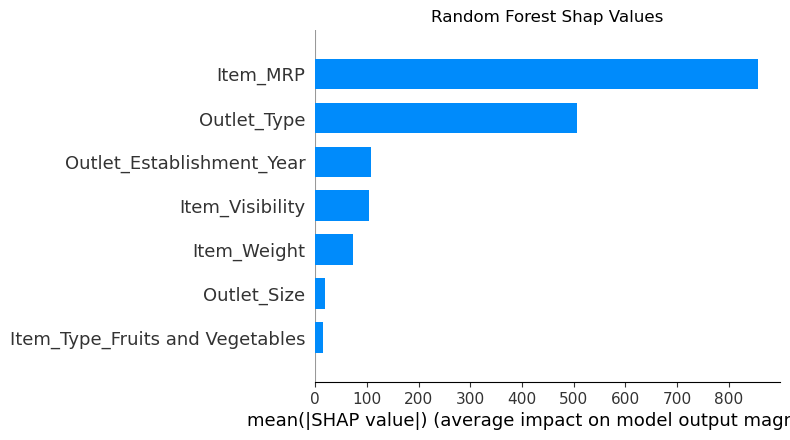

In [11]:
# create a summary plot (bar version)
shap.summary_plot(shap_values_rf, features = X_shap, plot_type = 'bar', 
                  show = False, max_display = 7) # show = False to manipulate with matplotlib
plt.title('Random Forest Shap Values')
plt.savefig('Random Forest Shap Values Bar.jpg', bbox_inches = 'tight')

<img src = 'Random Forest Importances.jpg'>

- Shap Values and Feature Importance have the same top 5 most important features. However, three of them are not in the same place. 
    1. Outlet_Establishment_Year is placed 3rd on Shap but for feature importance it is placed 5th.
    2. Item_Visibility is placed 4th on Shap but for feature importance it is placed 3rd.
    3. Item_weight is placed 5th on Shap but for feature importance it is placed 4th. <br>
    
    
- Shap values and Permutation Importance have the same top 3 most important features:
    1. Item_MRP
    2. Outlet_type
    3. Outlet_Establishment_year

### SHAP: Dot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


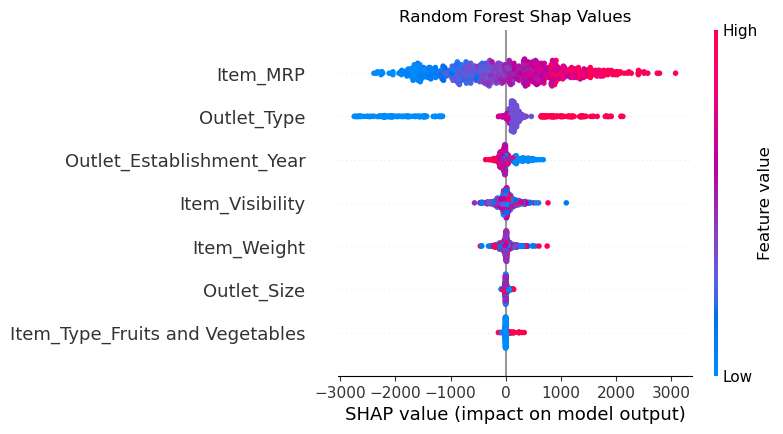

In [12]:
# create a summary plot (dot version)
shap.summary_plot(shap_values_rf, features = X_shap, show = False, 
                  max_display = 7)
plt.title('Random Forest Shap Values')
plt.savefig('Random Forest Shap Values Dot.jpg', bbox_inches = 'tight')

- Each dot represent an observation/row.

1. Item_MRP has the largest effect on Random Forest Model.
    - The red values are mostly seen on the right (positive side). The higher the retail price of the product, the higher the outlet sales the store will have.
2. Outlet_type has the second largest effect on the model.
    - A product being in a higher category(type), the higher the outlet sales the store will have.
3. Outlet_Establishment_Year
    - The red values (newly established) are leaning more on the left (negative) side. Newly Established outlets have lower sales than the Older Established outlets. 

## Tuned Random Forest

In [13]:
# Create an explainer for the rf_tuned
explainer_rf_tuned = shap.Explainer(rf_tuned)

# get shap values for rf_tuned
shap_values_rf_tuned = explainer_rf_tuned(X_shap)
shap_values_rf_tuned.shape

(750, 25)

### SHAP: Bar

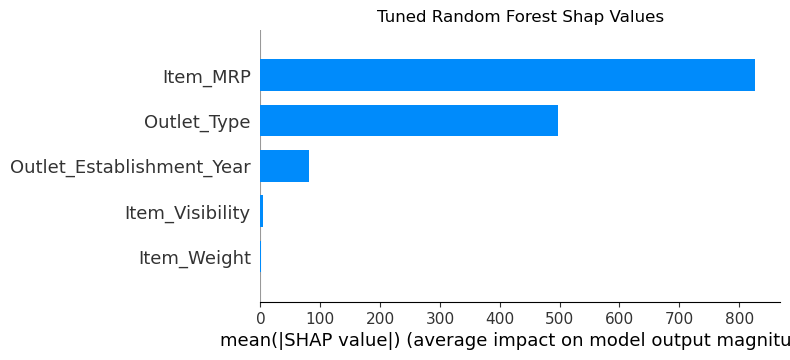

In [14]:
# create a summary plot (bar version)
shap.summary_plot(shap_values_rf_tuned, features = X_shap, plot_type = 'bar', 
                  show = False, max_display = 5)
plt.title('Tuned Random Forest Shap Values')
plt.savefig('Tuned Random Forest Shap Values Bar.jpg', bbox_inches = 'tight')

<img src = 'Tuned Forest Importances.jpg'>

- Shap values, Feature importance and Permutaton Importance for the Tuned Random Forest, all have the same top 3 most important values.
    1. Item_MRP
    2. Putlet_Type
    3. Outlet_Establishment_Year



### SHAP: Dot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


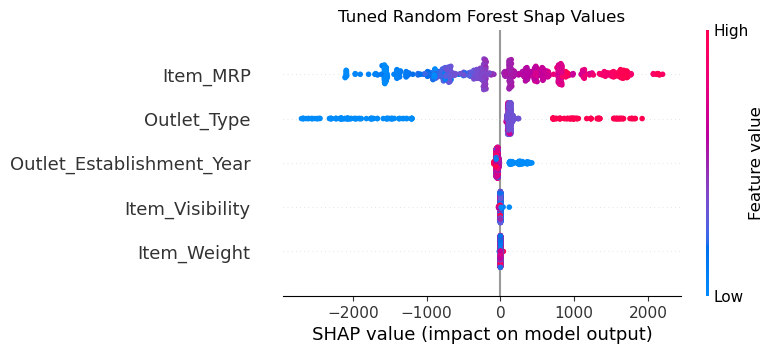

In [15]:
# create a summary plot (dot version)
shap.summary_plot(shap_values_rf_tuned, features = X_shap, show = False, 
                  max_display = 5)
plt.title('Tuned Random Forest Shap Values')
plt.savefig('Tuned Random Forest Shap Values Dot.jpg', bbox_inches = 'tight')

- Both Shap Dot and Shap Bar for the Defaulted Random Forest model and Tuned Random Forest Model have the same top 5 values.